**Capstone Project Module #2 - Sendhi Anshari Rasyid**

# **Latar Belakang**
Tak bisa dipungkiri, Bangkok merupakan salah satu destinasi utama yang dituju oleh para turis lokal ataupun internasional yang hendak berlibur ke Thailand. Pada tahun 2019, Bangkok bahkan menempati peringkat pertama pada daftar "Global Destination Cities Index 2019" versi Mastercard, mengalahkan Paris dan London. Setiap tahunnya, tercatat Bangkok memiliki total rata-rata pengunjung sebanyak 22.7 juta orang. [(Wikipedia)](https://en.wikipedia.org/wiki/Tourism_in_Bangkok)

Selain tempat ataupun daerah yang menjadi tujuan wisata, penginapan merupakan salah satu elemen penting yang harus diperhatikan ketika melakukan traveling. Oleh karena itu, Dinas Pariwisata Kota Bangkok ingin melakukan analisis terhadap penginapan yang tersebar di Bangkok dengan menggunakan data dari Airbnb Bangkok. Data tersebut digunakan karena Airbnb merupakan salah satu aplikasi yang menjadi pilihan utama para turis untuk mencari sebuah penginapan terutama di Bangkok.

Hasil analisis tersebut diharapkan dapat digunakan sebagai acuan melakukan evaluasi terhadap penginapan di Bangkok saat ini. Terutama untuk mengetahui apakah persebaran penginapan saat ini sudah cukup merata atau belum.

> *Stakeholder: Kepala Dinas Pariwisata Bangkok, tim R&D Dinas Pariwisata Bangkok, host Airbnb*

# **Rumusan Masalah**

1. Faktor apa saja yang mempengaruhi kunjungan dari sebuah penginapan?
1. Kapankah suatu penginapan ramai dikunjungi oleh para penyewa?
1. Apakah persebaran penginapan sudah cukup merata di Bangkok?

# **Tujuan**

1. Mengetahui faktor yang paling berpengaruh terhadap kunjungan sebuah penginapan di Bangkok
1. Mengetahui waktu yang menjadi puncak dari kunjungan pada penginapan di Bangkok
1. Mengetahui daerah mana yang menjadi pusat kunjungan dari para tamu yang singgah di Bangkok

## **Data**
Dataset yang digunakan pada analisis ini merupakan kumpulan dari *host* penginapan dalam aplikasi Airbnb yang berlokasi di sekitar Kota Bangkok, Thailand. Lengkap dengan detail lokasi, ketersediaan kamar, tipe kamar, dan lainnya. Dataset tersebut bisa diakses melalui [tautan ini.](https://drive.google.com/file/d/1Kagt-IMGruvyBV3tH6HYa721JK-TN-56/view?usp=drive_link)

### Penjelasan Dataset

Berikut adalah penjelasan detail dari setiap data yang termasuk dalam dataset tersebut:

-  `Unnamed: 0`: Index
-  `id`: ID Airbnb unik yang dimiliki setiap listing penginapan
-  `name`: Nama listing penginapan
-  `host_id`: ID Airbnb unik yang dimiliki oleh setiap host
-  `host_name`: Nama dari host pemilik penginapan
-  `neighborhood`: Lokasi/daerah di mana penginapan berada
-  `latitude`: Posisi koordinat garis lintang dari penginapan terkait
-  `longitude`: Posisi koordinat garis bujur dari penginapan terkait
-  `room_type`: Tipe dari kamar yang disewakan, terbagi menjadi 3; *entire place, private rooms, shared rooms*
-  `price`: Harga sewa per hari
-  `minimum_nights`: Jumlah minimal untuk menyewa kamar
-  `number_of_reviews`: Jumlah review keseluruhan yang dimiliki oleh penginapan
-  `last_review`: Tanggal review terakhir oleh konsumen
-  `reviews_per_month`: Jumlah review yang diterima oleh penginapan pada satu bulan
-  `calculated_host_listings_count`: Jumlah listing yang dimiliki oleh setiap host
-  `availability_365`: Ketersediaan kamar yang dapat disewa dalam kurun waktu 365 hari
-  `number_of_reviews_ltm`: Jumlah review yang dimiliki oleh penginapan (dalam 12 bulan terakhir)

### Data Preparation
Tahap persiapan dengan melakukan *import* beberapa *library* yang akan digunakan dalam mengelola dan menganalisis data lebih lanjut.

In [32]:
#Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, shapiro, kstest
import warnings
warnings.filterwarnings('ignore')

In [33]:
#Import Dataset
df=pd.read_csv('Airbnb Listings Bangkok.csv')

#Menampilkan 5 data sample acak yang terdapat di dalam dataset
display(df.sample(5))

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
727,727,6329764,House no 182 : 4BR Quiet&Cozy 10 Min MRT Lad Prao,28249813,Max,Chatu Chak,13.81110,100.57616,Entire home/apt,2600,1,157,2022-06-17,1.92,2,1,1
11019,11019,43900588,ห้องในฝัน,351437804,ฐิติวรดา,Suanluang,13.71296,100.63372,Entire home/apt,789,1,0,NaN,NaN,1,88,0
1857,1857,12222879,Toy@Diamond Sukhumvit,33330254,Toy,Khlong Toei,13.71006,100.59694,Private room,850,6,0,NaN,NaN,1,358,0
6466,6466,31025938,"26 m2, bathtub, 3pax, Airport Link/BTS Phayathai",231387551,Hotel Tranz,Ratchathewi,13.75550,100.53355,Private room,3900,1,3,2022-07-12,0.07,7,175,1
5644,5644,27557658,Long Stay Special Minimum 3 Nights - AVANI Deluxe Room Excluded Breakfast - - Comfort with modern amenities - Self controlled air-conditioning - 40” LCD TV - Rain Shower,187647176,Grand Mercure Bangkok Atrium,Huai Khwang,13.74789,100.57112,Hotel room,4540,1,0,NaN,NaN,11,0,0


> Untuk memperjelas data yang diinformasikan, akan dilakukan pengubahan beberapa nama kolom sebagai berikut:
>- `calculated_host_listings_count` menjadi `host_listings_count`
>- `neighbourhood` menjadi `location`
>- `available_365` menjadi `available_day`

In [34]:
#Mengganti nama kolom
df=df.rename(columns={'calculated_host_listings_count':'host_listings_count', 'neighbourhood':'location', 'availability_365':'available_day'})
df.head(5)

,Unnamed: 0,id,name,host_id,host_name,location,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,host_listings_count,available_day,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


### Data Understanding dan Data Cleaning
Sebelum melakukan analisis, terlebih dahulu dilakukan *data understanding* untuk lebih memahami isi dataset. Serta *data cleaning* untuk mengantisipasi kehadiran *error* ataupun *missing value* pada sebuah dataset.

Kedua hal tersebut dilakukan agar *data analysis* yang dilakukan nantinya bisa lebih efisien dan memiliki hasil yang maksimal.

Adapun beberapa tahapan tahapan yang akan saya lakukan, terdiri dari:

1. Identifikasi Data
1. Identifikasi Kolom yang Akan Dianalisis
1. Identifikasi Duplikasi Data pada Primary Key
1. Identifikasi dan Penanganan *Missing Value*
1. Identifikasi *Unique Data*
1. Identifikasi dan Penanganan *Outlier*

##### 1. Identifikasi Data

Tahap pertama yang dilakukan adalah memeriksa berbagai elemen yang terdapat pada sebuah dataset. Mulai dari jumlah data, tipe data dari masing-masing kolom, dan lainnya. Sebelum akhirnya mengambil keputusan untuk memanipulasi atau bahkan menghapus beberapa elemen data yang tidak dibutuhkan pada tahap analisis.

In [35]:
#Mengetahui jumlah data yang terdapat pada dataset
a,b = df.shape
print(f'Jumlah data yang terdapat pada adalah sebanyak {a} baris dan {b} kolom.\n')

#Melihat detail dataset
df.info()

Jumlah data yang terdapat pada adalah sebanyak 15854 baris dan 17 kolom.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15854 non-null  int64  
 1   id                     15854 non-null  int64  
 2   name                   15846 non-null  object 
 3   host_id                15854 non-null  int64  
 4   host_name              15853 non-null  object 
 5   location               15854 non-null  object 
 6   latitude               15854 non-null  float64
 7   longitude              15854 non-null  float64
 8   room_type              15854 non-null  object 
 9   price                  15854 non-null  int64  
 10  minimum_nights         15854 non-null  int64  
 11  number_of_reviews      15854 non-null  int64  
 12  last_review            10064 non-null  object 
 13  reviews_per_month      10064 non

> Beberapa informasi yang bisa didapatkan berdasarkan data di atas adalah sebagai berikut:
> - Jumlah data yang terdapat pada dataset ini adalah sebanyak 15854 baris yang terbagi pada 17 kolom.
>- Jumlah data pada kolom `last_review` dan `reviews_per_month` hanya sebanyak 10064 data saja. Jauh berbeda dengan total jumlah data keseluruhan, yaitu sebanyak 15854 data. Dapat disimpulkan (sementara) bahwa pada kedua kolom tersebut terdapat banyak data *Null*.
>- Tipe data yang terdapat di dalam dataset terbagi menjadi 12 kolom numerik dan 5 kolom non-numerik/object.
>- Penulisan tanggal pada kolom `last_review` masih membingungkan, oleh karena itu akan dilakukan pengubahan format penulisan tanggal.

In [36]:
#Format penulisan tanggal 'last_review' sebelum diubah
df[['last_review']].sample(5)

,last_review
13286,2022-10-26
8273,2022-12-21
2837,2022-01-09
4991,2020-03-04
15657,NaN


In [37]:
#Mengubah format penulisan tanggal pada kolom 'last_review'
df['last_review'] = pd.to_datetime(df['last_review']).dt.strftime("%d-%m-%Y")

In [38]:
#Format penulisan tanggal 'last_review' setelah diubah
df[['last_review']].sample(5)

,last_review
7977,NaN
707,18-11-2022
6637,04-12-2022
6926,22-12-2022
10941,22-12-2022


In [39]:
#Melihat statistik deskriptif dari masing-masing kolom data (numerik dan non-numerik)
display(df.describe(), df.describe(include='object'))

,Unnamed: 0,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,host_listings_count,available_day,number_of_reviews_ltm
count,15854.000000,1.585400e+04,1.585400e+04,15854.000000,15854.000000,1.585400e+04,15854.000000,15854.000000,10064.000000,15854.000000,15854.000000,15854.000000
mean,7926.500000,1.579397e+17,1.541058e+08,13.745144,100.559903,3.217704e+03,15.292355,16.654157,0.813145,13.889618,244.378643,3.481519
std,4576.799919,2.946015e+17,1.318726e+08,0.043040,0.050911,2.497212e+04,50.815020,40.613331,1.090196,30.269848,125.843224,8.916937
min,0.000000,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,3963.250000,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,0.120000,1.000000,138.000000,0.000000
50%,7926.500000,3.503734e+07,1.224556e+08,13.738490,100.561415,1.429000e+03,1.000000,2.000000,0.435000,4.000000,309.000000,0.000000
75%,11889.750000,5.256154e+07,2.390547e+08,13.759497,100.585150,2.429000e+03,7.000000,13.000000,1.060000,13.000000,360.000000,3.000000
max,15853.000000,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


,name,host_name,location,room_type,last_review
count,15846,15853,15854,15854,10064
unique,14794,5312,50,4,1669
top,New! La Chada Night Market studio 2PPL near MRT,Curry,Vadhana,Entire home/apt,11-12-2022
freq,45,228,2153,8912,189


> Berdasarkan informasi di atas, kita bisa mengetahui beberapa hal:
> - Pada kolom `Price` diketahui memiliki nilai minimal sebesar 0, di mana merupakan sebuah anomali. Karena *value* tersebut mengindikasikan bahwa ada sebuah *listing* penginapan yang bisa disewa dengan gratis. Sedangkan sebuah *listing* seharusnya memiliki *value* > 0 agar bisa disewakan.
> - Jumlah data *unique* pada kolom `name`, `host_name`, `location`, `room_type`, dan `last_review` memiliki selisih yang signifikan dengan total data *(count)* keseluruhan, sehingga dapat disimpulkan terdapat banyak duplikasi data. Hal ini bukanlah suatu anomali, mengingat kolom-kolom tersebut memang memiliki *value* yang berulang.

In [40]:
#Melihat data yang memiliki 'price' = 0
price_0 = df.loc[df['price'] == 0]

> Diketahui terdapat 1 data yang memiliki `price` = 0. Karena merupakan sebuah anomali data, maka diputuskan untuk menghapus row data tersebut.

In [41]:
#Menghapus row data yang memiliki 'price' = 0
df.drop(11103, inplace=True)

In [42]:
#Mengecek ulang data yang memiliki 'price' = 0
df.loc[df['price'] == 0]

,Unnamed: 0,id,name,host_id,host_name,location,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,host_listings_count,available_day,number_of_reviews_ltm


> Data dengan `price` = 0 sudah tidak ada di dalam dataset.

In [43]:
#Reset index setelah melakukan drop row
df.set_index('name', inplace=True)
df.reset_index(inplace=True)

In [44]:
#Pengecekan ulang statistik deskriptif dari masing-masing kolom data
display(df.describe(), df.describe(include='object'))

,Unnamed: 0,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,host_listings_count,available_day,number_of_reviews_ltm
count,15853.000000,1.585300e+04,1.585300e+04,15853.000000,15853.000000,1.585300e+04,15853.000000,15853.000000,10064.000000,15853.000000,15853.000000,15853.000000
mean,7926.299628,1.579496e+17,1.540928e+08,13.745144,100.559903,3.217907e+03,15.293257,16.655207,0.813145,13.890431,244.394058,3.481738
std,4576.874737,2.946082e+17,1.318666e+08,0.043041,0.050912,2.497290e+04,50.816496,40.614397,1.090196,30.270630,125.832224,8.917176
min,0.000000,2.793400e+04,5.892000e+04,13.527300,100.329550,2.780000e+02,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,3963.000000,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,0.120000,1.000000,138.000000,0.000000
50%,7926.000000,3.503224e+07,1.224556e+08,13.738490,100.561410,1.429000e+03,1.000000,2.000000,0.435000,4.000000,309.000000,0.000000
75%,11890.000000,5.256284e+07,2.390274e+08,13.759500,100.585150,2.429000e+03,7.000000,13.000000,1.060000,13.000000,360.000000,3.000000
max,15853.000000,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


,name,host_name,location,room_type,last_review
count,15845,15852,15853,15853,10064
unique,14793,5311,50,4,1669
top,New! La Chada Night Market studio 2PPL near MRT,Curry,Vadhana,Entire home/apt,11-12-2022
freq,45,228,2152,8912,189


> Dapat terlihat bahwa nilai min dari `price` sudah bukan 0 lagi, yang berarti data '11103' yang memiliki value=0 sudah berhasil terhapus.

##### 2. Identifikasi Duplikasi Data pada Primary Key

Karena kolom `ID` bertindak sebagai *primary key* pada dataset ini, maka prioritas pertama adalah mengecek apakah kolom tersebut memiliki duplikasi atau tidak agar akurasi dari analisis yang dilakukan bisa lebih akurat.

In [45]:
#Pengecekan duplikasi data pada kolom ID
print("Jumlah duplikasi data pada kolom 'ID' adalah sebanyak",
      df['id'].duplicated().sum(), "data.")

Jumlah duplikasi data pada kolom 'ID' adalah sebanyak 0 data.


> Setelah dilakukan pengecekan, ternyata kolom `ID` tidak memiliki duplikasi. 

Pada kolom lainnya tidak dicek apakah memiliki duplikasi atau tidak, karena sudah terwakili oleh pengecekan kolom `ID` ini. Kemunculan data berulang yang terjadi pada kolom `name`, `host_name`, `host_id`, `neighbourhood`, ataupun lainnya tidak akan berpengaruh pada proses analisis berikutnya.

##### 3. Identifikasi Kolom yang Akan Dianalisis

Sebelum memasuki tahapan analisis data, terlebih dahulu mengidentifikasi kolom mana yang tidak akan digunakan dalam tahap tersebut karena tidak relevan dengan rumusan masalah. Beberapa yang saya putuskan untuk dihapus secara permanen adalah sebagai berikut:
- kolom `Unnamed: 0`, karena informasinya hanya merupakan duplikasi dari informasi index setiap data
- kolom `host_id`, karena hanya menunjukkan ID dari setiap host
- kolom `id`, karena hanya menunjukkan ID dari setiap listing

In [46]:
df.drop(['Unnamed: 0', 'id', 'host_id'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15853 entries, 0 to 15852
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   15845 non-null  object 
 1   host_name              15852 non-null  object 
 2   location               15853 non-null  object 
 3   latitude               15853 non-null  float64
 4   longitude              15853 non-null  float64
 5   room_type              15853 non-null  object 
 6   price                  15853 non-null  int64  
 7   minimum_nights         15853 non-null  int64  
 8   number_of_reviews      15853 non-null  int64  
 9   last_review            10064 non-null  object 
 10  reviews_per_month      10064 non-null  float64
 11  host_listings_count    15853 non-null  int64  
 12  available_day          15853 non-null  int64  
 13  number_of_reviews_ltm  15853 non-null  int64  
dtypes: float64(3), int64(6), object(5)
memory usage: 1.7+ 

##### 4. Identifikasi dan Penanganan Missing Value

In [47]:
#Fungsi tampil missing value
def persentase_null():
    return round(df.isnull().sum() * 100 / len(df), 2)

def jumlah_null():
    return df.isna().sum()

#Dataframe missing value
df_null = pd.DataFrame({
    'Jumlah Data': jumlah_null(),
    'Persentase': persentase_null()
})

#Fungsi pengecekan keberadaan missing value dari setiap kolom
def cek_missing_value():
    print('Jumlah missing value di setiap kolom adalah sebagai berikut:\n')
    print(df_null)
    print('\nJumlah missing value dari semua kolom sebanyak', jumlah_null().sum(), 'data.')

In [48]:
#Pengecekan missing value
cek_missing_value()

Jumlah missing value di setiap kolom adalah sebagai berikut:

                       Jumlah Data  Persentase
name                   8            0.05      
host_name              1            0.01      
location               0            0.00      
latitude               0            0.00      
longitude              0            0.00      
room_type              0            0.00      
price                  0            0.00      
minimum_nights         0            0.00      
number_of_reviews      0            0.00      
last_review            5789         36.52     
reviews_per_month      5789         36.52     
host_listings_count    0            0.00      
available_day          0            0.00      
number_of_reviews_ltm  0            0.00      

Jumlah missing value dari semua kolom sebanyak 11587 data.


>1. Beberapa kolom masih memiliki *missing value*, dengan detail sebagai berikut:
>- `name` sebanyak 8 data atau 0.05%
>- `host_name` sebanyak 1 data atau 0.01%
>- `last_review` sebanyak 5789 data atau 36.52%
>- `reviews_per_month` sebanyak 5789 data atau 36.52%
>2. Total dari keseluruhan *missing value* yang terdapat pada dataset adalah sejumlah 11587 data.
>3. Walaupun memiliki *missing value* yang cukup besar presentasinya, karena kolom `last_review` akan dijadikan sebagai salah satu acuan dalam melakukan analisis, maka kolom tersebut tetap dipertahankan.

Kolom-kolom yang masih memiliki *missing value* tersebut akan dicek satu per satu, sebelum diputuskan tindak lanjut seperti apa yang harus dilakukan pada data-data tersebut.

In [49]:
#Pengecekan missing value pada kolom name
df[df['name'].isna()]

,name,host_name,location,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,host_listings_count,available_day,number_of_reviews_ltm
439,NaN,Titawan,Phra Khanong,13.69406,100.59619,Private room,1080,5,0,NaN,NaN,1,365,0
544,NaN,Cherry,Din Daeng,13.77562,100.57346,Private room,1200,1,0,NaN,NaN,1,365,0
572,NaN,Parichart,Bang Phlat,13.78376,100.49821,Private room,1200,1,0,NaN,NaN,1,365,0
669,NaN,Chira,Bang Na,13.68276,100.60894,Entire home/apt,2424,2,0,NaN,NaN,1,365,0
1030,NaN,Nantida,Vadhana,13.74126,100.55761,Private room,5000,3,0,NaN,NaN,1,365,0
1282,NaN,Diamond Bangkok,Ratchathewi,13.75328,100.52928,Private room,930,1,6,13-05-2017,0.07,1,365,0
1594,NaN,Khaneungnit,Vadhana,13.71757,100.60464,Private room,1000,1,0,NaN,NaN,1,365,0
2075,NaN,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,11-12-2017,0.03,3,220,0


In [50]:
#Proses mengubah missing value pada kolom `name` menjadi "No Name"
df['name'].fillna('No Name', inplace=True)
df[df['name'] == 'No Name']

,name,host_name,location,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,host_listings_count,available_day,number_of_reviews_ltm
439,No Name,Titawan,Phra Khanong,13.69406,100.59619,Private room,1080,5,0,NaN,NaN,1,365,0
544,No Name,Cherry,Din Daeng,13.77562,100.57346,Private room,1200,1,0,NaN,NaN,1,365,0
572,No Name,Parichart,Bang Phlat,13.78376,100.49821,Private room,1200,1,0,NaN,NaN,1,365,0
669,No Name,Chira,Bang Na,13.68276,100.60894,Entire home/apt,2424,2,0,NaN,NaN,1,365,0
1030,No Name,Nantida,Vadhana,13.74126,100.55761,Private room,5000,3,0,NaN,NaN,1,365,0
1282,No Name,Diamond Bangkok,Ratchathewi,13.75328,100.52928,Private room,930,1,6,13-05-2017,0.07,1,365,0
1594,No Name,Khaneungnit,Vadhana,13.71757,100.60464,Private room,1000,1,0,NaN,NaN,1,365,0
2075,No Name,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,11-12-2017,0.03,3,220,0


> Seluruh *missing value* pada kolom `name` kini telah diisi oleh *value* "No Name."

In [51]:
#Pengecekan missing value pada kolom host name
df[df['host_name'].isna()]

,name,host_name,location,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,host_listings_count,available_day,number_of_reviews_ltm
3571,Cozy Hideaway,NaN,Bang Kapi,13.76999,100.63769,Private room,1399,3,1,29-07-2017,0.02,1,365,0


In [52]:
#Proses mengubah missing value pada kolom `name` menjadi "No Name"
df['host_name'].fillna('No Name', inplace=True)
df[df['host_name'] == 'No Name']

,name,host_name,location,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,host_listings_count,available_day,number_of_reviews_ltm
3571,Cozy Hideaway,No Name,Bang Kapi,13.76999,100.63769,Private room,1399,3,1,29-07-2017,0.02,1,365,0


> *Missing value* pada kolom `host_name` kini telah diisi oleh *value* "No Name."

In [53]:
#Pengecekan missing value pada kolom last_review
df[df['last_review'].isna()]

,name,host_name,location,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,host_listings_count,available_day,number_of_reviews_ltm
1,"Easy going landlord,easy place",Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaN,NaN,2,358,0
2,modern-style apartment in Bangkok,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaN,NaN,1,365,0
4,Suite Room 3 at MetroPoint,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaN,NaN,3,365,0
7,1 chic bedroom apartment in BKK,Jiraporn,Chatu Chak,13.829250,100.567370,Entire home/apt,1461,1,0,NaN,NaN,1,365,0
14,"Deluxe Condo, Nana, Pool/GYM/Sauna",Natcha,Khlong Toei,13.715160,100.568060,Entire home/apt,1400,30,0,NaN,NaN,1,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15848,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15849,Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15850,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15851,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0


In [54]:
#Proses mengubah missing value pada kolom `last_review` menjadi "-"
df['last_review'].fillna('-', inplace=True)
df[df['last_review'] == '-']

,name,host_name,location,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,host_listings_count,available_day,number_of_reviews_ltm
1,"Easy going landlord,easy place",Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,-,NaN,2,358,0
2,modern-style apartment in Bangkok,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,-,NaN,1,365,0
4,Suite Room 3 at MetroPoint,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,-,NaN,3,365,0
7,1 chic bedroom apartment in BKK,Jiraporn,Chatu Chak,13.829250,100.567370,Entire home/apt,1461,1,0,-,NaN,1,365,0
14,"Deluxe Condo, Nana, Pool/GYM/Sauna",Natcha,Khlong Toei,13.715160,100.568060,Entire home/apt,1400,30,0,-,NaN,1,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15848,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,-,NaN,1,362,0
15849,Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,-,NaN,14,365,0
15850,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,-,NaN,14,365,0
15851,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,-,NaN,14,365,0


> *Missing value* pada kolom `last_review` kini telah diisi oleh *value* "-"

In [55]:
#Pengecekan missing value pada kolom reviews_per_month
df[df['reviews_per_month'].isna()]

,name,host_name,location,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,host_listings_count,available_day,number_of_reviews_ltm
1,"Easy going landlord,easy place",Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,-,NaN,2,358,0
2,modern-style apartment in Bangkok,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,-,NaN,1,365,0
4,Suite Room 3 at MetroPoint,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,-,NaN,3,365,0
7,1 chic bedroom apartment in BKK,Jiraporn,Chatu Chak,13.829250,100.567370,Entire home/apt,1461,1,0,-,NaN,1,365,0
14,"Deluxe Condo, Nana, Pool/GYM/Sauna",Natcha,Khlong Toei,13.715160,100.568060,Entire home/apt,1400,30,0,-,NaN,1,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15848,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,-,NaN,1,362,0
15849,Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,-,NaN,14,365,0
15850,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,-,NaN,14,365,0
15851,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,-,NaN,14,365,0


In [56]:
#Proses mengubah missing value pada kolom `reviews_per_month` menjadi "0"
df['reviews_per_month'].fillna('0', inplace=True)
df[df['reviews_per_month'] == '0']

,name,host_name,location,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,host_listings_count,available_day,number_of_reviews_ltm
1,"Easy going landlord,easy place",Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,-,0,2,358,0
2,modern-style apartment in Bangkok,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,-,0,1,365,0
4,Suite Room 3 at MetroPoint,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,-,0,3,365,0
7,1 chic bedroom apartment in BKK,Jiraporn,Chatu Chak,13.829250,100.567370,Entire home/apt,1461,1,0,-,0,1,365,0
14,"Deluxe Condo, Nana, Pool/GYM/Sauna",Natcha,Khlong Toei,13.715160,100.568060,Entire home/apt,1400,30,0,-,0,1,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15848,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,-,0,1,362,0
15849,Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,-,0,14,365,0
15850,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,-,0,14,365,0
15851,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,-,0,14,365,0


> *Missing value* pada kolom `reviews_per_month` kini telah diisi oleh *value* "0"

In [57]:
#Dataframe missing value
df_null = pd.DataFrame({
    'Jumlah Data': jumlah_null(),
    'Persentase': persentase_null()
})

#Pengecekan ulang missing value dari setiap kolom
cek_missing_value()

Jumlah missing value di setiap kolom adalah sebagai berikut:

                       Jumlah Data  Persentase
name                   0            0.0       
host_name              0            0.0       
location               0            0.0       
latitude               0            0.0       
longitude              0            0.0       
room_type              0            0.0       
price                  0            0.0       
minimum_nights         0            0.0       
number_of_reviews      0            0.0       
last_review            0            0.0       
reviews_per_month      0            0.0       
host_listings_count    0            0.0       
available_day          0            0.0       
number_of_reviews_ltm  0            0.0       

Jumlah missing value dari semua kolom sebanyak 0 data.


> Dapat terlihat pada informasi di atas, bahwa kini pada dataset sudah tidak memiliki *missing value* lagi.

##### 5. Identifikasi Unique Data

In [58]:
pd.set_option('display.max_colwidth', 1)

#Menampilkan data unik dari setiap kolom
listItem=[]
for col in df.columns:
    listItem.append([col, df[col].nunique(), df[col].unique()])

UniqueTable=pd.DataFrame(columns=['Nama Kolom', 'Jumlah Data Unik', 'Sample Unik'],
                        data=listItem)
UniqueTable

,Nama Kolom,Jumlah Data Unik,Sample Unik
0,name,14794,"[Nice room with superb city view, Easy going landlord,easy place, modern-style apartment in Bangkok, Spacious one bedroom at The Kris Condo Bldg. 3, Suite Room 3 at MetroPoint, NEw Pro!! Bungalow Bkk Centre, Condo with Chaopraya River View, 1 chic bedroom apartment in BKK, Batcave, Pool view, near Chatuchak, Standard Room Decor do Hostel, Sathorn Terrace Apartment(61), 2BR apt in a cozy neighborhood, Comfy bedroom near River pier & BTS Taksin., budget hotel bangkok near subway, Deluxe Condo, Nana, Pool/GYM/Sauna, Luxury@swimpool/FreeWiFi/nearJJMkt, Nice and Quiet condo near BTS Onnut, 24Flr- 1br Apt near JJ, MRT, BTS, Central Bangkok 3 Bedroom Apartment, The Duplex - Asoke- Luxury 92sqm, New, Stylish & Luxury Studio Condo, River View - Ivy Condo (1 Bedroom), Siamese Gioia on Sukhumvit 31, Contemporary Modern Duplex-Thong Lo, Pan Dao Condo 5 min from BTS On Nut, 1 BR condominium center BKK +NETFLIX+55SQM, 1 penthouse in central Bangkok, MetroPoint Suite Room, Near Airport, Boutique Rooms Near Bangkok Airport, BangLuang House1 @ Bangkok Thailand, Studio near Chula University/Silom walk to MRT/BTS, กรองทองแมนชั่น (ลาดพร้าว 81), Deluxe one Bedroom Condo w.Pool-GYM & Sauna 8-7, Beautiful 1 BR apartment @BTS Ari, Urban Oasis in the heart of Bangkok, 1Bed apt. near Chula University/Silom, Stay at the ROARING RATCHADA!, 60 m2 apartment in Thong Lor, Bangkok, ICONSIAM River view on 49th floor, 2br apt in Sukhumvit Asoke near BTS, Self catering cozy1-bed near BTS, ❂☀☀☀Perfect Escape☀☀☀Sunny Roof EnSuite☀☀☀☀, Room with city view of BKK, BangLuang House 2@ Bangkok Thailand, Tranquility found in busy Bangkok near new skytran, Private room in Bangkok, ☞✪✪✪✪Roomy Studio 4 Family r friends✪No Stairs✪✪✪✪, ☞Downtown Central Studio-Bangkok MRT, Beautiful Wood Bangkok Resort House, ""Serviced 2 Bed Scenic SkyVillas"", Cozy 1BR rooftop (BTS Ploenchit) heart of bangkok, Chic two bedroom for Monthly rental, Sukhumvit52 near SkyTrain to BkkCBD, ♡Chic Studio, Easy Walk to Pier & BTS Taksin♡, One Bedroom Suite- WIFI- SATHORN, STUDIO RM2 - WIFI- SATHORN, Quiet Double Bed Apartment, Quiet Double Bed Apartment, Suvarnabhumi free transfer, Luxury&Comfy wthWifi walk-distance to Subwy-Malls, Apr. for rent full fur 1 bedroom, monthly, Long-stay special rate spacious entire floor Siam, One Bed Room at Sukumvit 50 Bangkok, City View, relaxed theme & delicious food around, Ideo Blucove Sukhumvit Bangkok, 2-BR condo near BTS on Sukhumvit Rd, NewlyRenovated! 3Br,SingleHouse, Park/BTS/Airport., IdeoMix, Sukhumvit RD, close to BTS, Mix Dorm Decor do Hostel, Oasis in the heart of Bangkok, 5 mins by car from Chong Nonsi BTS Station, Inn Saladaeng - Superior hotel room, Best nr Chatujak, MRT, BTS free wifi&fNetflix, ❂Citycenter✔Subway station✔Private Bathroom4Aircon, Nice River View Condominium 30 sq.m, Monthly rent 2Beds/2Baths quiet APT at BTS, Sukhumvit apartment near Nana BTS, A room w/ the view :-) in the city, Spacious 1Bed apartment, Near Bangkok more space than urban!, ✺✺99 feet in the sky✺✺, Cozy Studio Apt near Skytrain.(72/74), Asoke: tasteful, modern 1BR condo, 2 bed 2 bath, BTS, Supermarkets, Monthly, Private, relaxed with amenities, S1 hostel (Dorm) Sathorn Bangkok, 3 minutes walk to Phrom Phong BTS, 1 BDM CONDO SAPHAN KWAI/ARI walk to JJ/BTS/MRT, เฮ้าส์โหมด House Mode, ❂100% Private&Central Light EnSuite, Spacious Studio kitchen/wifi, 2. Bangkok bright Apartment 201, 1.Bangkok great value Studio WIFI, BKK City Fab Luxx Studio free wifi @1194, 5. Bangkok Bright Apartment -WIFI, 6. Bangkok nice, cosy Apartment 201, 7. Bangkok big bright Apartment 402, STUDIO-WIFI-RAIN SHOWER-SATHORN, Luxury Riverview Teakwood Apartment-Great Views :), 1 Bed Pool Access Onnut BTS, ...]"
1,host_name,5312,"[Nuttee, Emy, Familyroom, Sirilak, Kasem, Wimonpak, Athitaya, Jiraporn, Nol, Somsak, Tor, Jing, Mimi, Natcha, Srisuk, Piyakorn, Sue, Henry, Timo, Pat, Muay, Chuchart, Shine, Dustin, Sudhichai, Anya, Parinya, วสวัตติ์, G

> - Setelah dilakukan pengetesan dan pengecekan ulang, kolom `ID` yang bertindak sebagai *primary key* sudah dipastikan tidak memiliki duplikasi data.
> - Kolom `room_type` memiliki 4 opsi *value*, yaitu Entire home/apt, Private room, Hotel room, dan Shared room.
> - Sudah tidak terdapat *missing value.*

##### 5. Identifikasi dan Penanganan Outlier

Sebelum memasuki tahap *data analysis*, terlebih dahulu diidentifikasi outlier berupa data yang bernilai ekstrem. Penanganan outlier ini cukup penting karena dapat meningkatkan kualitas dan juga efektifitas dari suatu analisis.

In [59]:
#Pengecekan statistik dari beberapa kolom yang akan dicek outlier-nya
df[['minimum_nights', 'available_day', 'price', 'number_of_reviews']].describe()

,minimum_nights,available_day,price,number_of_reviews
count,15853.000000,15853.000000,1.585300e+04,15853.000000
mean,15.293257,244.394058,3.217907e+03,16.655207
std,50.816496,125.832224,2.497290e+04,40.614397
min,1.000000,0.000000,2.780000e+02,0.000000
25%,1.000000,138.000000,9.000000e+02,0.000000
50%,1.000000,309.000000,1.429000e+03,2.000000
75%,7.000000,360.000000,2.429000e+03,13.000000
max,1125.000000,365.000000,1.100000e+06,1224.000000


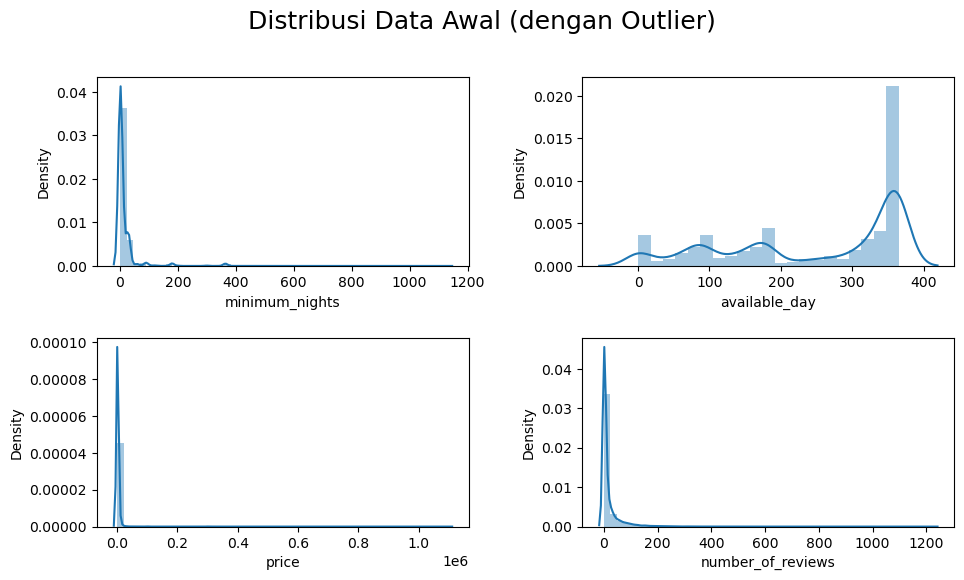

In [60]:
#Visualisasi data
plt.figure(figsize=(10,6)).suptitle("Distribusi Data Awal (dengan Outlier)", fontsize=18)

columns = ['minimum_nights', 'available_day', 'price', 'number_of_reviews']
for i, columns in enumerate(columns, start=1):
    plt.subplot(2,2,i)
    sns.distplot(df[columns])

plt.tight_layout(pad=2.0)
plt.show()

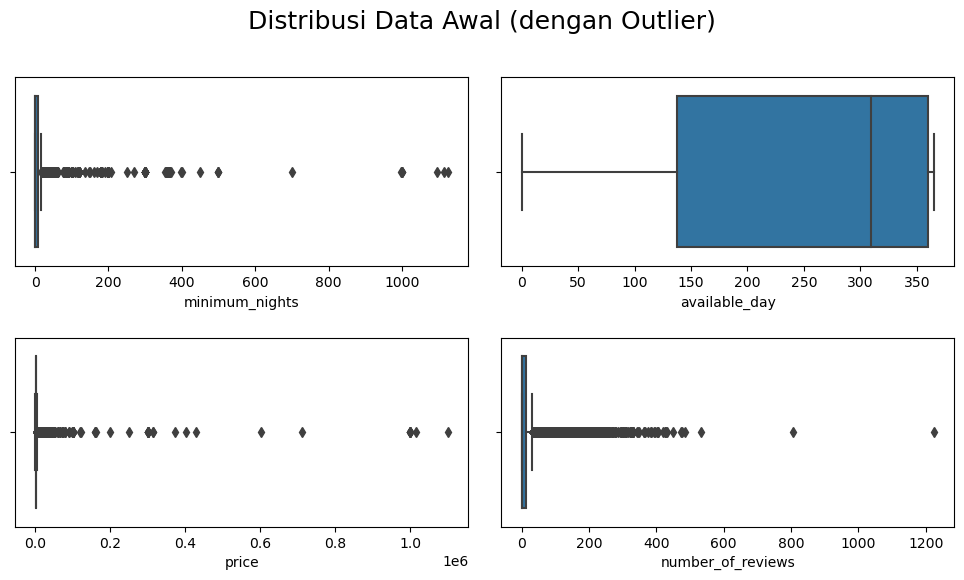

In [61]:
#Visualisasi data
columns_outlier = ['minimum_nights', 'available_day', 'price', 'number_of_reviews']

plt.figure(figsize=(10,6)).suptitle("Distribusi Data Awal (dengan Outlier)", fontsize=18)

for i, columns in enumerate(columns_outlier, start=1):
    plt.subplot(2,2,i)
    sns.boxplot(x=df[columns])

plt.tight_layout(pad=2.0)
plt.show()

In [62]:
for columns in columns_outlier:
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3-Q1

    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    outliers=df[(df[columns] < lower_bound) | (df[columns] > upper_bound)][columns]

    print(f"[{columns}]")
    print(f"Nilai batas bawah dari kolom {columns} adalah {lower_bound} dan nilai batas atasnya adalah {upper_bound}.")
    print(f"Outliers pada {columns} adalah sebanyak {outliers.count()} data atau sebesar {round(outliers.count()/df.shape[0]*100,2)}%\n")

[minimum_nights]
Nilai batas bawah dari kolom minimum_nights adalah -8.0 dan nilai batas atasnya adalah 16.0.
Outliers pada minimum_nights adalah sebanyak 3168 data atau sebesar 19.98%

[available_day]
Nilai batas bawah dari kolom available_day adalah -195.0 dan nilai batas atasnya adalah 693.0.
Outliers pada available_day adalah sebanyak 0 data atau sebesar 0.0%

[price]
Nilai batas bawah dari kolom price adalah -1393.5 dan nilai batas atasnya adalah 4722.5.
Outliers pada price adalah sebanyak 1403 data atau sebesar 8.85%

[number_of_reviews]
Nilai batas bawah dari kolom number_of_reviews adalah -19.5 dan nilai batas atasnya adalah 32.5.
Outliers pada number_of_reviews adalah sebanyak 2240 data atau sebesar 14.13%



> Pada hasil identifikasi di atas, dapat diketahui bahwa hanya kolom `available_day` yang tidak memiliki outlier dengan presentase sebesar 0%. Sedangkan kolom lainnya, memiliki outlier dengan detail sebagai berikut:
>- kolom `minimum_nights` sebanyak 1451 data atau sebesar 14.4%
>- kolom `price` sebanyak 385 data atau sebesar 3.82%
>- kolom `number_of_reviews` sebanyak 1124 data atau sebesar 11.16%

Meskipun nilai presentase dari masing-masing kolomnya terhitung kecil, agar proses analisis data mendapatkan hasil yang maksimal, outlier yang terdapat pada kolom-kolom tersebut akan dihapus melalui proses di bawah ini.

In [63]:
#Menghapus Outlier
for columns in columns_outlier:
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3-Q1

    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    df=df[(df[columns] >= lower_bound) & (df[columns] <= upper_bound)]

df.reset_index(drop=True, inplace=True)

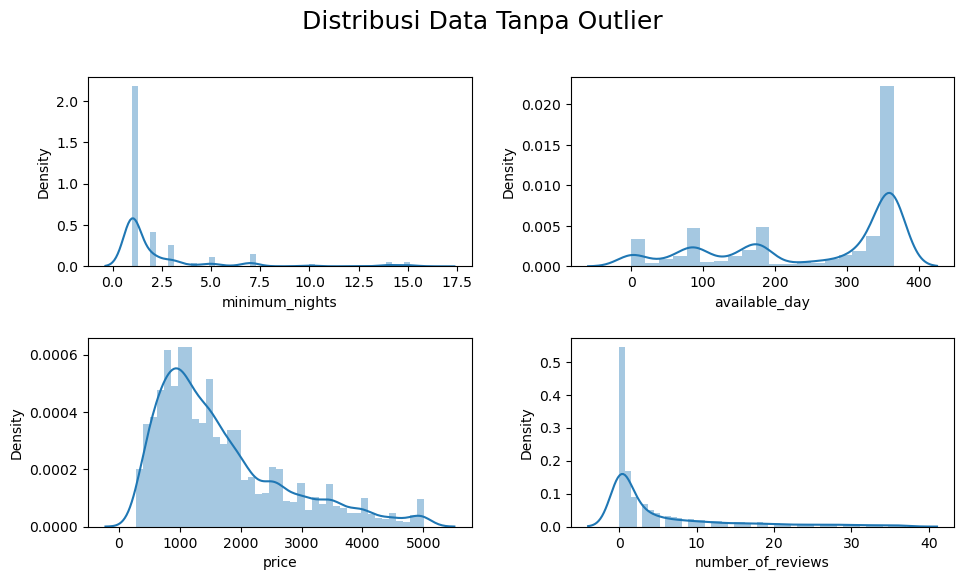

In [64]:
plt.figure(figsize=(10,6)).suptitle("Distribusi Data Tanpa Outlier", fontsize=18)

for i, columns in enumerate(columns_outlier, start=1):
    plt.subplot(2,2,i)
    sns.distplot(df[columns])

plt.tight_layout(pad=2.0)
plt.show()

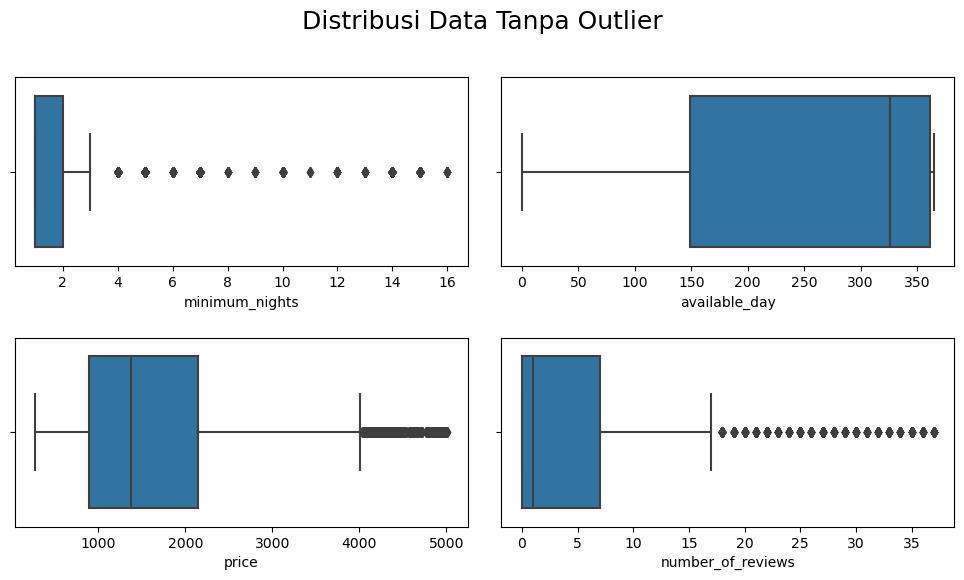

In [65]:
plt.figure(figsize=(10,6)).suptitle("Distribusi Data Tanpa Outlier", fontsize=18)

for i, columns in enumerate(columns_outlier, start=1):
    plt.subplot(2,2,i)
    sns.boxplot(x=df[columns])

plt.tight_layout(pad=2.0)
plt.show()

In [66]:
#Pengecekan ulang presentase outlier
for columns in columns_outlier:
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3-Q1

    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    outliers=df[(df[columns] < lower_bound) | (df[columns] > upper_bound)][columns]

    print(f"[{columns}]")
    print(f"Nilai batas bawah dari kolom {columns} adalah {lower_bound} dan nilai batas atasnya adalah {upper_bound}.")
    print(f"Outliers pada {columns} adalah sebanyak {outliers.count()} data atau sebesar {round(outliers.count()/df.shape[0]*100,2)}%\n")

[minimum_nights]
Nilai batas bawah dari kolom minimum_nights adalah -0.5 dan nilai batas atasnya adalah 3.5.
Outliers pada minimum_nights adalah sebanyak 1451 data atau sebesar 14.4%

[available_day]
Nilai batas bawah dari kolom available_day adalah -170.5 dan nilai batas atasnya adalah 681.5.
Outliers pada available_day adalah sebanyak 0 data atau sebesar 0.0%

[price]
Nilai batas bawah dari kolom price adalah -977.5 dan nilai batas atasnya adalah 4026.5.
Outliers pada price adalah sebanyak 385 data atau sebesar 3.82%

[number_of_reviews]
Nilai batas bawah dari kolom number_of_reviews adalah -10.5 dan nilai batas atasnya adalah 17.5.
Outliers pada number_of_reviews adalah sebanyak 1124 data atau sebesar 11.16%



> Meskipun masih memiliki outlier, tapi kini memiliki presentase yang lebih kecil sehingga membuat visualisasi dari distribusi datanya semakin bisa terlihat jelas. Outlier tersebut akan dipertahankan dan tidak akan ditindaklanjuti lebih jauh, karena masing-masing value untuk setiap kolomnya masih dalam tahap yang masuk akal. Mengingat kebijakan mengenai penentuan `minimum_nights`, `price`, dan `number_of_reviews` dilakukan oleh setiap host dengan pertimbangannya masing-masing.

In [67]:
#Pengujian Normalitas
alpha = 0.05

for columns in columns_outlier:
    statistic, p_value = shapiro(df[columns])
    print(f'[{columns}]')
    print('Nilai Statistik Uji:', round(statistic, 3))
    print('p-value:', p_value)
    if p_value < alpha:
        print('Data tidak terdistribusi normal.\n')
    else:
        print('Data terdistribusi normal.\n')

[minimum_nights]
Nilai Statistik Uji: 0.52
p-value: 0.0
Data tidak terdistribusi normal.

[available_day]
Nilai Statistik Uji: 0.811
p-value: 0.0
Data tidak terdistribusi normal.

[price]
Nilai Statistik Uji: 0.891
p-value: 0.0
Data tidak terdistribusi normal.

[number_of_reviews]
Nilai Statistik Uji: 0.687
p-value: 0.0
Data tidak terdistribusi normal.



> Setelah dilakukan pengujian normalitas dengan menggunakan metode Shapiro-Wilk pada kolom `minimum_nights`, `available_day`, `price`, dan `number_of_reviews`, dapat disimpulkan bahwa semua datanya tidak terdistribusi normal.

##### Hasil Data Understanding dan Data Cleaning

Setelah melalui tahap *data understanding* dan *data cleaning*, kini informasi yang tersaji sudah lebih terkurasi. Sehingga proses selanjutnya, yaitu *data analysis* akan memiliki akurasi yang lebih tinggi dan efisien.

In [68]:
display(df.head(), df.tail())

,name,host_name,location,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,host_listings_count,available_day,number_of_reviews_ltm
0,"Easy going landlord,easy place",Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,-,0,2,358,0
1,Spacious one bedroom at The Kris Condo Bldg. 3,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,01-04-2022,0.03,1,323,1
2,Suite Room 3 at MetroPoint,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,-,0,3,365,0
3,Condo with Chaopraya River View,Athitaya,Rat Burana,13.68556,100.49535,Private room,1558,3,1,03-02-2014,0.01,1,365,0
4,1 chic bedroom apartment in BKK,Jiraporn,Chatu Chak,13.82925,100.56737,Entire home/apt,1461,1,0,-,0,1,365,0


,name,host_name,location,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,host_listings_count,available_day,number_of_reviews_ltm
10068,Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea,Phakhamon,Ratchathewi,13.752904,100.540381,Private room,1400,1,0,-,0,14,357,0
10069,Euro LuxuryHotel PratunamMKt TripleBdNrShopingArea,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,-,0,14,365,0
10070,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,-,0,14,365,0
10071,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,-,0,14,365,0
10072,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,Phakhamon,Ratchathewi,13.752960,100.540820,Private room,1214,1,0,-,0,14,365,0


Secara keseluruhan, pada tahapan *data understanding dan cleaning* ini bisa disimpulkan menjadi beberapa poin berikut:
1. Jumlah keseluruhan pada dataset ini adalah sebanyak 15854 data yang terbagi pada 17 kolom.
1. Anomali data pada kolom `price` telah berhasil ditangani dengan melakukan *drop row data*.
1. Kolom `ID` yang bersifat sebagai *primary key* tidak memiliki duplikasi data.
1. *Missing value* pada kolom `name`, `host_name`, `last_review`, `reviews_per_month` sudah berhasil ditangani.
1. Kolom `room_type` memiliki 4 opsi *value*, yaitu Entire home/apt, Private room, Hotel room, dan Shared room.
1. Seluruh *missing value* telah berhasil ditanggulangi.
1. Kolom yang dilakukan uji normalitas dan juga pengecekan outlier adalah kolom-kolomo yang nantinya akan dimasukkan dalam tahap *data analysis*, yaitu `minimum_nights`, `price`, `available_day`, dan `number_of_reviews`.
1. Berdasarkan pengujian, hanya kolom `available_day` yang tidak memiliki outlier sama sekali.
1. Outlier pada kolom `minimum_nights`, `price`, `number_of_reviews` telah berhasil ditanggulangi, meskipun tidak dihapus seluruhnya. Mengingat outlier yang masih ada masih dalam tahap masuk akal, karena diisi berdasarkan kebijakan dari masing-masing host.
1. Setelah dilakukan uji normalitas, dapat disimpulkan bahwa data pada kolom `minimum_nights`, `available_day`, `price`, `number_of_reviews` tidak terdistribusi normal.

### Data Analysis
Setelah dilakukan *data cleaning*, tahap selanjutnya adalah melakukan analisa data untuk menjawab beberapa rumusan masalah yang telah disampaikan sebelumnya.

Karena pada data ini tidak tersedia data mengenai kapan seorang tamu menginap, maka diasumsikan data pada kolom `last_review` sebagai hari di mana tamu menginap.

#### Melihat Persebaran Airbnb di Bangkok

Terdapat beberapa hal yang bisa kita ketahui ketika ingin mencari tahu mengenai persebaran Airbnb di Bangkok.

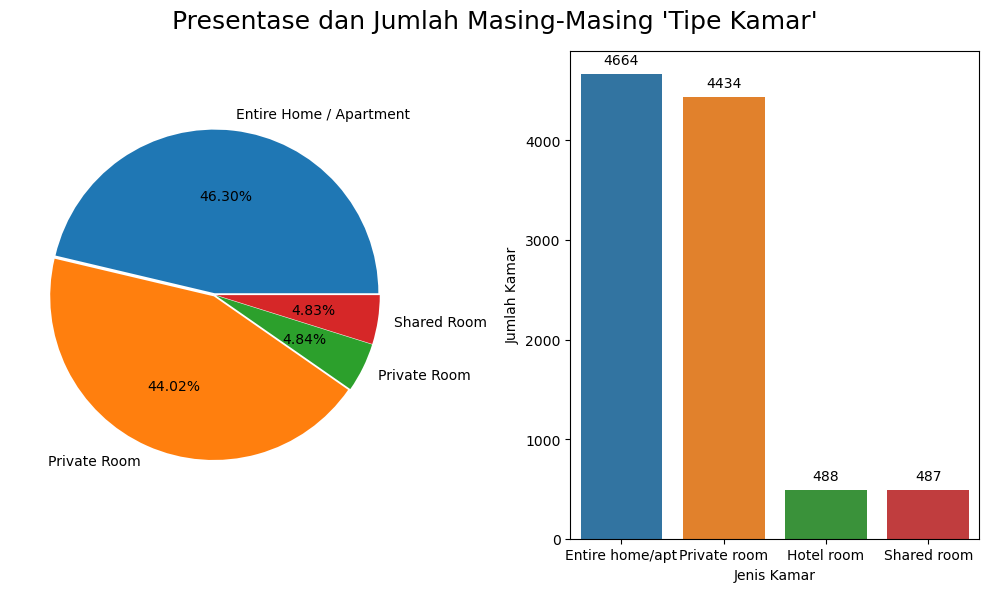

In [69]:
#Visualisasi grafik jumlah masing-masing `Tipe Kamar`
plt.figure(figsize=(10,6)).suptitle("Presentase dan Jumlah Masing-Masing 'Tipe Kamar'", fontsize=18)
plt.subplot(1,2,1)
plt.pie(df['room_type'].value_counts(), labels=['Entire Home / Apartment','Private Room', 'Private Room', 'Shared Room'], autopct='%.2f%%', explode=(0.01, 0.01, 0.01, 0.01))
plt.subplot(1,2,2)
ax = sns.countplot(x='room_type', data=df, order=df['room_type'].value_counts().index)
for val in ax.patches:
    ax.annotate(f'{int(val.get_height())}', (val.get_x() + val.get_width() / 2., val.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.xlabel('Jenis Kamar')
plt.ylabel('Jumlah Kamar')

plt.tight_layout()
plt.show()

> - Berdasarkan gambar di atas, dapat diketahui bahwa "Entire Home / Apartment" merupakan tipe kamar yang paling banyak dimiliki oleh penginapan di Bangkok, dengan total sebanyak 8912 kamar atau 56.22%. Lalu disusul oleh tipe "Private Room" dengan total sebanyak 5770 kamar atau 36.4%.
> - Tipe "Hotel Room" dan "Shared Room" memiliki persentase jumlah yang sangat sedikit dan timpang dibanding kedua tipe kamar lainnya, yaitu sebanyak 648 buah atau 4.09% untuk "Hotel Room" dan 523 buah atau 3.30% untuk "Shared Room".

Dapat disimpulkan bahwa penginapan Airbnb di Bangkok saat ini didominasi oleh tipe "Entire Home / Apartment" dengan perbedaan jumlah/persentase yang sangat signifikan dibanding tipe lainnya.

In [70]:
#Dataframe 10 host yang memiliki penginapan terbanyak di Bangkok
df_host_group = df.groupby(['host_name'])['host_listings_count']
df_host_result = df_host_group.count()
df_host_result = df_host_result.sort_values(ascending=False).reset_index().head(10)
df_host_result = pd.DataFrame(df_host_result)

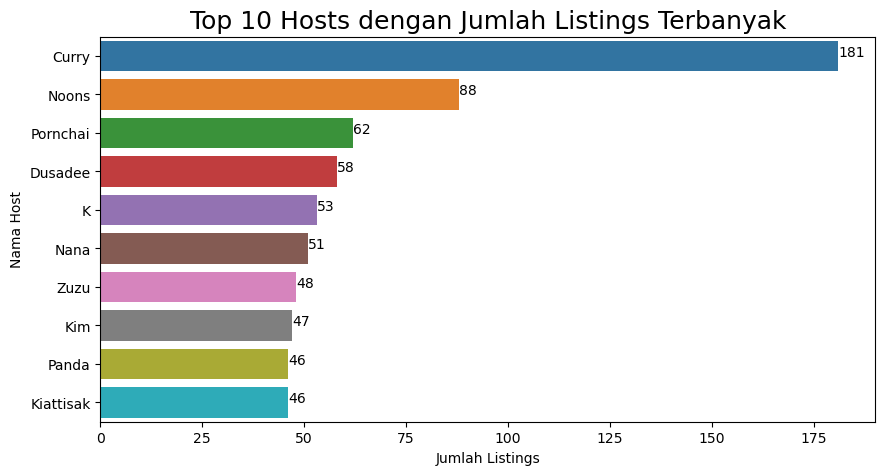

In [71]:
#Visualisasi barplot
plt.figure(figsize=(10,5))
sns.barplot(x='host_listings_count', y='host_name', data=df_host_result)
for index, value in enumerate(df_host_result['host_listings_count']):
    plt.text(value, index, str(value))
plt.xlabel('Jumlah Listings')
plt.ylabel('Nama Host')
plt.title('Top 10 Hosts dengan Jumlah Listings Terbanyak', size=18)
plt.show()

In [72]:
df_search = df.loc[(df['host_name'] == 'Curry') & (df['number_of_reviews'] == 0)]
df_results = df_search.sort_values(by='number_of_reviews', ascending=False)
df_results.tail(10)
#berapa persen yang kosong dan mana penginapan yang paling penuhnya

,name,host_name,location,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,host_listings_count,available_day,number_of_reviews_ltm
6594,New! La Chada Night Market studio 2PPL near MRT,Curry,Huai Khwang,13.765780,100.586970,Entire home/apt,1057,1,0,-,0,228,0,0
6756,sky pool/Sukhumvit/Prom Prong/asok/Terminal 21/gym,Curry,Vadhana,13.741350,100.568190,Entire home/apt,2845,1,0,-,0,228,359,0
6760,New! La Chada Night Market Studio 2PPL near MRT,Curry,Thung khru,13.657160,100.500880,Entire home/apt,1057,1,0,-,0,228,0,0
8852,15days!New!Bang Phlat MRT 600m/swiming pool/gym,Curry,Bang Phlat,13.789200,100.502600,Entire home/apt,738,15,0,-,0,228,159,0
9011,15days!New!Bang Phlat MRT 600m/swiming pool/gym,Curry,Bang Phlat,13.788938,100.503600,Entire home/apt,883,15,0,-,0,228,253,0
9270,Sale! BTS On Nut/Sukhumvit 87/loft/pool/gym/wifi,Curry,Phra Khanong,13.701565,100.603293,Entire home/apt,1714,1,0,-,0,228,352,0
9688,30days! AirportLink Sukhumvit NANA MaxValu 2BR(4P),Curry,Ratchathewi,13.750300,100.555503,Entire home/apt,3994,3,0,-,0,228,340,0
10012,5days!New!Bang Phlat MRT 600m/swiming pool/gym,Curry,Bang Phlat,13.788938,100.503600,Entire home/apt,3822,5,0,-,0,228,311,0


In [73]:
#Dataframe jumlah penginapan di setiap daerahnya
df_loct_group = df.groupby(['location'])['host_listings_count']
df_loct_result = df_loct_group.count()
df_loct_result = df_loct_result.sort_values(ascending=False).reset_index().head(10)
df_loct_result = pd.DataFrame(df_loct_result)

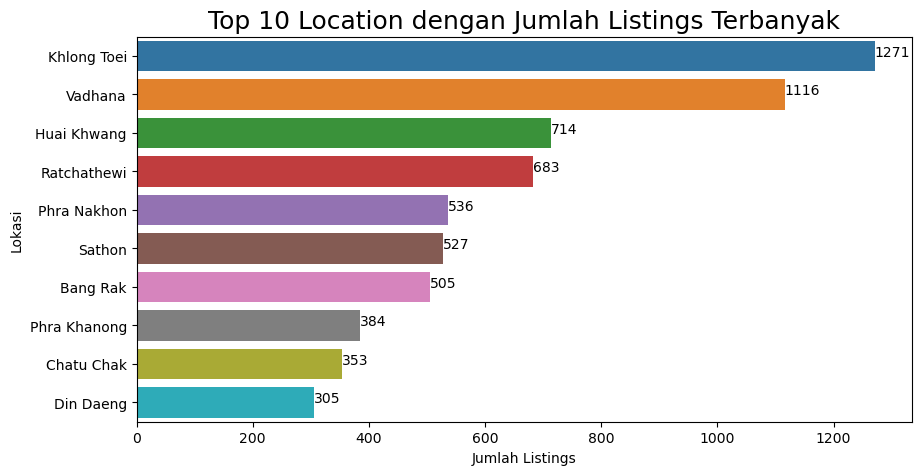

In [74]:
#Visualisasi barplot
plt.figure(figsize=(10,5))
sns.barplot(x='host_listings_count', y='location', data=df_loct_result)
for index, value in enumerate(df_loct_result['host_listings_count']):
    plt.text(value, index, str(value))
plt.xlabel('Jumlah Listings')
plt.ylabel('Lokasi')
plt.title('Top 10 Location dengan Jumlah Listings Terbanyak', size=18)
plt.show()